In [1]:
print("Jupyter funkar 🎉")

Jupyter funkar 🎉


In [3]:
import pandas as pd
print("pandas funkar 🎉")

pandas funkar 🎉


In [8]:
import os
os.getcwd()

'/Users/kiara/Documents/matkassen-etl/notebook'

In [3]:
import pandas as pd

# Läs in huvuddatan (filen ligger i samma mapp som notebook)
df = pd.read_csv("matkassen_data.csv")

# Visa de första 5 raderna
df.head()

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
0,LEV-2024-000001,PREN-1002,KUND-05001,2024-04-10,NaN,NaN,NaN,Klassisk,Standard,4,...,2024-07-03,10393,699,Levererad,Panerad fisk med remouladsås,Kyckling Tikka Masala,Köttfärssås med pasta,NaN,NaN,NaN
1,LEV-2024-000002,PREN-1003,KUND-05002,2024-06-12,NaN,NaN,NaN,Familj,Standard,6,...,2024-07-02,40545,"919,00",Levererad,Chicken nuggets-sallad,Köttbullar med makaroner,Fiskpinnar med potatismos,Älskar att slippa planera middagar. Tack!,2024-07-07,4.0
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,NaN,NaN,2024-07-16,Vegetarisk,NaN,4,...,2024-07-02,10686,709,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
3,LEV-2024-000004,PREN-1017,KUND-05016,2024-05-26,NaN,NaN,NaN,Snabb & Enkel,Laktosfri,4,...,2024-07-01,40695,689,Levererad,15-minuters wok,Toast med avokado och ägg,Snabb tomatsoppa,Priset är högt men sparar tid. På gränsen.,2024-07-06,3.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,NaN,NaN,2024-08-19,KLASSISK,NaN,2,...,2024-07-01,21938,499,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0


In [4]:
df.head()

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
0,LEV-2024-000001,PREN-1002,KUND-05001,2024-04-10,NaN,NaN,NaN,Klassisk,Standard,4,...,2024-07-03,10393,699,Levererad,Panerad fisk med remouladsås,Kyckling Tikka Masala,Köttfärssås med pasta,NaN,NaN,NaN
1,LEV-2024-000002,PREN-1003,KUND-05002,2024-06-12,NaN,NaN,NaN,Familj,Standard,6,...,2024-07-02,40545,"919,00",Levererad,Chicken nuggets-sallad,Köttbullar med makaroner,Fiskpinnar med potatismos,Älskar att slippa planera middagar. Tack!,2024-07-07,4.0
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,NaN,NaN,2024-07-16,Vegetarisk,NaN,4,...,2024-07-02,10686,709,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
3,LEV-2024-000004,PREN-1017,KUND-05016,2024-05-26,NaN,NaN,NaN,Snabb & Enkel,Laktosfri,4,...,2024-07-01,40695,689,Levererad,15-minuters wok,Toast med avokado och ägg,Snabb tomatsoppa,Priset är högt men sparar tid. På gränsen.,2024-07-06,3.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,NaN,NaN,2024-08-19,KLASSISK,NaN,2,...,2024-07-01,21938,499,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0


In [5]:
df['antal_portioner'].describe()

count     2819
unique      13
top          4
freq      1377
Name: antal_portioner, dtype: object

In [6]:
# Förvandla till numeriskt, sätt felaktiga värden till NaN
df['antal_portioner'] = pd.to_numeric(df['antal_portioner'], errors='coerce')

In [7]:
df[df['antal_portioner'] < 0]

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg


In [8]:
df['antal_portioner'].describe()

count    2688.000000
mean        3.643601
std         1.455783
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: antal_portioner, dtype: float64

# 'antal_portioner' column cleaned: converted to numeric, no negative values found

In [10]:
df['veckapris'].head(10)
df['veckapris'].describe(include='all')

count     2819
unique      84
top        699
freq       402
Name: veckapris, dtype: object

In [12]:
# Byt ut komma mot punkt och konvertera till float
df['veckapris'] = df['veckapris'].astype(str).str.replace(',', '.')
df['veckapris'] = pd.to_numeric(df['veckapris'], errors='coerce')

In [13]:
df['veckapris'].describe()

count    2719.000000
mean      668.435454
std       164.856481
min         0.000000
25%       499.000000
50%       699.000000
75%       749.000000
max       949.000000
Name: veckapris, dtype: float64

# 'veckapris' column cleaned: commas replaced with dot, converted to numeric, no negative values

In [14]:
# Visa de första 10 raderna
df['pren_startdatum'].head(10)

# Visa statistik / antal unika värden
df['pren_startdatum'].describe()

count           2819
unique           139
top       2024-06-03
freq              77
Name: pren_startdatum, dtype: object

In [15]:
df['pren_startdatum'] = pd.to_datetime(df['pren_startdatum'], errors='coerce')

In [16]:
df['pren_startdatum'].head(10)
df['pren_startdatum'].describe()

count                          2819
mean     2024-07-23 04:37:53.146505
min             2024-04-05 00:00:00
25%             2024-05-28 00:00:00
50%             2024-07-29 00:00:00
75%             2024-09-16 00:00:00
max             2024-11-28 00:00:00
Name: pren_startdatum, dtype: object

# 'pren_startdatum' column cleaned: converted to datetime, all dates verified

In [17]:
# Visa de första 10 raderna
df['paus_från'].head(10)

# Statistik / antal unika värden
df['paus_från'].describe()

count             65
unique            28
top       2024-07-20
freq               8
Name: paus_från, dtype: object

In [18]:
df['paus_från'] = pd.to_datetime(df['paus_från'], errors='coerce')

In [19]:
df['paus_från'].head(10)
df['paus_från'].describe()

count                            65
mean     2024-08-12 16:59:04.615384
min             2024-06-10 00:00:00
25%             2024-07-14 00:00:00
50%             2024-07-20 00:00:00
75%             2024-09-14 00:00:00
max             2024-12-06 00:00:00
Name: paus_från, dtype: object

# 'paus_från' column cleaned: converted to datetime, NaN handled automatically

In [20]:
# Visa de första 10 raderna
df['paus_till'].head(10)

# Statistik / antal unika värden
df['paus_till'].describe()

count             65
unique            30
top       2024-08-05
freq               6
Name: paus_till, dtype: object

In [21]:
# Konvertera paus_till till datetime
df['paus_till'] = pd.to_datetime(df['paus_till'], errors='coerce')

# Kontrollera att det blev rätt
df['paus_till'].head(10)
df['paus_till'].describe()

count                            65
mean     2024-08-30 08:07:23.076923
min             2024-06-24 00:00:00
25%             2024-08-02 00:00:00
50%             2024-08-12 00:00:00
75%             2024-09-25 00:00:00
max             2024-12-24 00:00:00
Name: paus_till, dtype: object

# paus_till har rensats och konverterats till datetime

In [22]:
df['pren_avslutsdatum'].describe()
df['pren_avslutsdatum'].value_counts()

pren_avslutsdatum
2024-08-12    23
2024-08-26    21
2024-09-29    20
2024-11-30    18
2024-08-05    16
              ..
2024-04-17     1
2024-07-18     1
2024-07-27     1
2024-09-25     1
2025-01-27     1
Name: count, Length: 69, dtype: int64

In [23]:
df['pren_avslutsdatum'] = pd.to_datetime(df['pren_avslutsdatum'], errors='coerce')
df['pren_avslutsdatum'].describe()

count                           443
mean     2024-10-12 22:25:44.018058
min             2024-04-17 00:00:00
25%             2024-08-26 00:00:00
50%             2024-10-05 00:00:00
75%             2024-11-30 00:00:00
max             2025-01-27 00:00:00
Name: pren_avslutsdatum, dtype: object

In [24]:
df['pren_avslutsdatum'].dtype

dtype('<M8[us]')

In [25]:
df['pren_avslutsdatum'] = pd.to_datetime(df['pren_avslutsdatum'], errors='coerce')

In [26]:
df['pren_avslutsdatum'].isna().sum()

np.int64(2376)

In [27]:
# Tar bort rader med NaN i kolumnen 'pren_avslutsdatum'
df_clean = df.dropna(subset=['pren_avslutsdatum'])

# Kolla att det funkar
df_clean.head()

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,NaT,NaT,2024-07-16,Vegetarisk,NaN,4.0,...,2024-07-02,10686,709.0,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,NaT,NaT,2024-08-19,KLASSISK,NaN,2.0,...,2024-07-01,21938,499.0,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0
6,LEV-2024-000007,PREN-1024,KUND-05023,2024-05-14,NaT,NaT,2024-08-05,Klassisk,Standard,6.0,...,2024-07-02,60258,899.0,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Biff med bearnaise,NaN,NaN,NaN
10,LEV-2024-000011,PREN-1035,KUND-05034,2024-05-09,NaT,NaT,2024-07-22,Klassisk,Standard,2.0,...,2024-07-03,60055,499.0,Missad,Panerad fisk med remouladsås,Laxfile med potatismos,Köttfärssås med pasta,NaN,NaN,NaN
11,LEV-2024-000012,PREN-1038,KUND-05037,2024-06-09,NaT,NaT,2024-08-05,Klassisk,Laktosfri,2.0,...,2024-07-03,10738,529.0,Levererad,Kyckling Tikka Masala,Kycklinggryta med ris,Panerad fisk med remouladsås,NaN,NaN,NaN


In [28]:
df.dropna(subset=['pren_avslutsdatum'], inplace=True)

# Tar bort rader där pren_avslutsdatum saknas
# gjorde detta för att bara analysera prenumerationer som faktiskt har ett avslutsdatum
df.dropna(subset=['pren_avslutsdatum'], inplace=True)

In [29]:
# Konvertera 'pren_avslutsdatum' till datetime
df['pren_avslutsdatum'] = pd.to_datetime(df['pren_avslutsdatum'], errors='coerce')

# Kolla första raderna för att se att det funkar
df['pren_avslutsdatum'].head()

2    2024-07-16
4    2024-08-19
6    2024-08-05
10   2024-07-22
11   2024-08-05
Name: pren_avslutsdatum, dtype: datetime64[us]

In [30]:
df['paus_från'] = pd.to_datetime(df['paus_från'], errors='coerce')

In [31]:
# Grundläggande statistik
print(df['paus_från'].describe())

# Kolla hur många NaT
print("Antal saknade (NaT):", df['paus_från'].isna().sum())

# Kolla några exempel på datum
print(df['paus_från'].head(10))

count                            22
mean     2024-07-30 14:10:54.545454
min             2024-06-10 00:00:00
25%             2024-07-14 00:00:00
50%             2024-07-16 12:00:00
75%             2024-08-11 12:00:00
max             2024-10-30 00:00:00
Name: paus_från, dtype: object
Antal saknade (NaT): 421
2           NaT
4           NaT
6           NaT
10          NaT
11          NaT
15   2024-06-10
17          NaT
18          NaT
20          NaT
21          NaT
Name: paus_från, dtype: datetime64[us]


In [32]:
# Steg 1: Kolla hur många saknade värden (NaT) finns i paus_från
antal_saknade = df['paus_från'].isna().sum()
print("Antal saknade (NaT):", antal_saknade)

# Visa några av raderna som har NaT
print(df[df['paus_från'].isna()].head())

Antal saknade (NaT): 421
        leverans_id prenumeration_id     kund_id pren_startdatum paus_från  \
2   LEV-2024-000003        PREN-1011  KUND-05010      2024-05-11       NaT   
4   LEV-2024-000005        PREN-1018  KUND-05017      2024-05-02       NaT   
6   LEV-2024-000007        PREN-1024  KUND-05023      2024-05-14       NaT   
10  LEV-2024-000011        PREN-1035  KUND-05034      2024-05-09       NaT   
11  LEV-2024-000012        PREN-1038  KUND-05037      2024-06-09       NaT   

   paus_till pren_avslutsdatum     kasstyp kostpreferens  antal_portioner  \
2        NaT        2024-07-16  Vegetarisk           NaN              4.0   
4        NaT        2024-08-19    KLASSISK           NaN              2.0   
6        NaT        2024-08-05    Klassisk      Standard              6.0   
10       NaT        2024-07-22    Klassisk      Standard              2.0   
11       NaT        2024-08-05    Klassisk     Laktosfri              2.0   

    ... leveransdatum postnummer veckapris 

In [33]:
# Skapa en analysvänlig kolumn, där NaT blir ett tydligt värde
df['paus_från_filled'] = df['paus_från'].fillna(pd.Timestamp('9999-12-31'))

# Kolla några exempel
print(df[['paus_från', 'paus_från_filled']].head(10))

    paus_från paus_från_filled
2         NaT       9999-12-31
4         NaT       9999-12-31
6         NaT       9999-12-31
10        NaT       9999-12-31
11        NaT       9999-12-31
15 2024-06-10       2024-06-10
17        NaT       9999-12-31
18        NaT       9999-12-31
20        NaT       9999-12-31
21        NaT       9999-12-31


In [34]:
# Skapa analysvänlig kolumn för paus_till
df['paus_till_filled'] = df['paus_till'].fillna(pd.Timestamp('9999-12-31'))

# Kolla några exempel
print(df[['paus_till', 'paus_till_filled']].head(10))

    paus_till paus_till_filled
2         NaT       9999-12-31
4         NaT       9999-12-31
6         NaT       9999-12-31
10        NaT       9999-12-31
11        NaT       9999-12-31
15 2024-06-24       2024-06-24
17        NaT       9999-12-31
18        NaT       9999-12-31
20        NaT       9999-12-31
21        NaT       9999-12-31


In [35]:
print(df['veckapris'].head(10))
print(df['veckapris'].dtype)

2     709.0
4     499.0
6     899.0
10    499.0
11    529.0
15    659.0
17    489.0
18    499.0
20      0.0
21    729.0
Name: veckapris, dtype: float64
float64


In [37]:
# Kolla om det finns nollor eller NaN
print(df['veckapris'].isna().sum())   # saknade värden
print((df['veckapris'] == 0).sum())   # värden som är 0

17
4


In [38]:
print(df[['recept_1', 'recept_2', 'recept_3']].isna().sum())

recept_1    0
recept_2    0
recept_3    0
dtype: int64


In [39]:
for col in ['recept_1','recept_2','recept_3']:
    print(col)
    print(df[col].value_counts().head(10))  # topp 10 mest förekommande
    print()

recept_1
recept_1
Kycklinggryta med ris           39
Panerad fisk med remouladsås    36
Laxfile med potatismos          34
Köttfärssås med pasta           30
Pasta Carbonara                 30
Fläskfilé med gräddsås          27
Biff med bearnaise              26
Kyckling Tikka Masala           23
Quesadillas                     16
Köttbullar med makaroner        16
Name: count, dtype: int64

recept_2
recept_2
Fläskfilé med gräddsås          39
Köttfärssås med pasta           34
Laxfile med potatismos          31
Kyckling Tikka Masala           31
Biff med bearnaise              29
Panerad fisk med remouladsås    28
Kycklinggryta med ris           27
Pasta Carbonara                 26
Ramen-nudlar                    18
15-minuters wok                 16
Name: count, dtype: int64

recept_3
recept_3
Pasta Carbonara                 40
Biff med bearnaise              37
Köttfärssås med pasta           34
Panerad fisk med remouladsås    31
Kyckling Tikka Masala           29
Fläskfilé med grä

In [40]:
# Slå ihop alla recept-kolumner i en lång lista
alla_recept = pd.concat([df['recept_1'], df['recept_2'], df['recept_3']])

# Räkna frekvensen
recept_topplista = alla_recept.value_counts().head(10)
print(recept_topplista)

Köttfärssås med pasta           98
Pasta Carbonara                 96
Panerad fisk med remouladsås    95
Fläskfilé med gräddsås          92
Biff med bearnaise              92
Kycklinggryta med ris           91
Laxfile med potatismos          88
Kyckling Tikka Masala           83
Sallad med räkor                38
Köttbullar med makaroner        36
Name: count, dtype: int64


In [41]:
for col in ['recept_1', 'recept_2', 'recept_3']:
    df[col] = df[col].str.strip()  # ta bort extra mellanslag
    df[col] = df[col].str.title()  # första bokstav stor

In [44]:
for col in ['recept_1', 'recept_2', 'recept_3']:
    print(f"{col} saknade värden:", df[col].isna().sum())
    df[col] = df[col].fillna("Okänt")

recept_1 saknade värden: 0
recept_2 saknade värden: 0
recept_3 saknade värden: 0


In [45]:
for col in ['recept_1', 'recept_2', 'recept_3']:
    df[col] = df[col].str.strip()  # tar bort extra mellanslag
    df[col] = df[col].str.title()  # första bokstav stor, resten små

In [46]:
for col in ['recept_1', 'recept_2', 'recept_3']:
    print(df[col].value_counts().head(10))

recept_1
Kycklinggryta Med Ris           39
Panerad Fisk Med Remouladsås    36
Laxfile Med Potatismos          34
Köttfärssås Med Pasta           30
Pasta Carbonara                 30
Fläskfilé Med Gräddsås          27
Biff Med Bearnaise              26
Kyckling Tikka Masala           23
Quesadillas                     16
Köttbullar Med Makaroner        16
Name: count, dtype: int64
recept_2
Fläskfilé Med Gräddsås          39
Köttfärssås Med Pasta           34
Laxfile Med Potatismos          31
Kyckling Tikka Masala           31
Biff Med Bearnaise              29
Panerad Fisk Med Remouladsås    28
Kycklinggryta Med Ris           27
Pasta Carbonara                 26
Ramen-Nudlar                    18
15-Minuters Wok                 16
Name: count, dtype: int64
recept_3
Pasta Carbonara                 40
Biff Med Bearnaise              37
Köttfärssås Med Pasta           34
Panerad Fisk Med Remouladsås    31
Kyckling Tikka Masala           29
Fläskfilé Med Gräddsås          26
Kycklinggry

In [47]:
# Skapa nya kolumner där NaT blir ett tydligt värde (placeholder)
df['paus_från_filled'] = df['paus_från'].fillna(pd.Timestamp('9999-12-31'))
df['paus_till_filled'] = df['paus_till'].fillna(pd.Timestamp('9999-12-31'))

In [48]:

print(df[['paus_från', 'paus_från_filled', 'paus_till', 'paus_till_filled']].head(10))

    paus_från paus_från_filled  paus_till paus_till_filled
2         NaT       9999-12-31        NaT       9999-12-31
4         NaT       9999-12-31        NaT       9999-12-31
6         NaT       9999-12-31        NaT       9999-12-31
10        NaT       9999-12-31        NaT       9999-12-31
11        NaT       9999-12-31        NaT       9999-12-31
15 2024-06-10       2024-06-10 2024-06-24       2024-06-24
17        NaT       9999-12-31        NaT       9999-12-31
18        NaT       9999-12-31        NaT       9999-12-31
20        NaT       9999-12-31        NaT       9999-12-31
21        NaT       9999-12-31        NaT       9999-12-31


In [49]:
# Kolla saknade värden
print("Saknade värden (NaN):", df['veckapris'].isna().sum())

# Kolla nollor
print("Värden som är 0:", (df['veckapris'] == 0).sum())

# Kolla datatyp
print("Datatyp:", df['veckapris'].dtype)

Saknade värden (NaN): 17
Värden som är 0: 4
Datatyp: float64


In [50]:
# Kolla median först
median_pris = df['veckapris'].median()
print("Median för veckapris:", median_pris)

# Fyll NaN och 0 med medianen
df['veckapris'] = df['veckapris'].replace(0, median_pris)  # ersätt 0
df['veckapris'] = df['veckapris'].fillna(median_pris)      # ersätt NaN

Median för veckapris: 679.0


In [51]:

print("Saknade värden (NaN):", df['veckapris'].isna().sum())
print("Värden som är 0:", (df['veckapris'] == 0).sum())

Saknade värden (NaN): 0
Värden som är 0: 0



# Här har jag rensat kolumnen 'veckapris' genom att ersätta alla saknade värden (NaN)
# och alla värden som är 0 med medianen för kolumnen.
# Detta gör att kolumnen blir komplett och inga konstiga 0-värden eller saknade värden
# påverkar analysen senare.

In [52]:
# Kolla hur många NaN eller 0 som finns
print(df['antal_portioner'].isna().sum())
print((df['antal_portioner'] == 0).sum())

# Fyll NaN eller 0 med medianen
median_portioner = df['antal_portioner'].median()
df['antal_portioner'] = df['antal_portioner'].replace(0, median_portioner)
df['antal_portioner'] = df['antal_portioner'].fillna(median_portioner)

# Kolla igen 
print(df['antal_portioner'].isna().sum())
print((df['antal_portioner'] == 0).sum())

20
10
0
0


# antal_portioner:
# Hade både saknade värden (NaN) och 0-värden.
# Dessa ersattes med medianen för att behålla rimliga värden
# utan att vrida datan.

In [53]:
df['kasstyp'].isna().sum()

np.int64(0)

In [54]:
df['kasstyp'].value_counts()

kasstyp
Klassisk         213
Snabb & Enkel     75
Vegetarisk        49
Familj            44
Standard          10
KLASSISK           9
Classic            7
klassisk           6
Express            4
snabb              3
VEGETARISK         3
vegetarisk         3
30-min             3
Vegetarian         2
FAMILJ             2
Family             2
Familjekassen      2
Veg                2
Quick              1
Veggie             1
Snabb & enkel      1
familj             1
Name: count, dtype: int64

In [55]:
df['kasstyp'] = df['kasstyp'].str.strip().str.lower()

In [56]:
df['kasstyp'] = df['kasstyp'].replace({
    'klassisk': 'klassisk',
    'classic': 'klassisk',

    'vegetarisk': 'vegetarisk',
    'vegetarian': 'vegetarisk',
    'veg': 'vegetarisk',
    'veggie': 'vegetarisk',

    'familj': 'familj',
    'family': 'familj',
    'familjekassen': 'familj',

    'snabb & enkel': 'snabb & enkel',
    'snabb': 'snabb & enkel',
    'quick': 'snabb & enkel',
    'express': 'snabb & enkel',
    '30-min': 'snabb & enkel'
})

In [57]:
df['kasstyp'].value_counts()

kasstyp
klassisk         235
snabb & enkel     87
vegetarisk        60
familj            51
standard          10
Name: count, dtype: int64

# kasstyp:
# Kategorisk kolumn med många variationer i stavning och språk.
# Normaliserade text till lowercase och slog ihop likvärdiga värden
# till gemensamma huvudkategorier för tydligare analys.

In [58]:
df['kostpreferens'].isna().sum()

np.int64(30)

In [59]:
df['kostpreferens'].value_counts()

kostpreferens
Standard           237
Laktosfri           72
Fläskfri            26
Nötfri              18
unknown             13
Glutenfri           12
Ingen preferens      6
Ingen fläsk          4
LF                   4
LAKTOSFRI            3
Normal               3
Inga                 3
nötfri               3
standard             3
Nut free             1
laktosfri            1
NF                   1
Lactose free         1
FLÄSKFRI             1
Nötter               1
Name: count, dtype: int64

In [60]:
df['kostpreferens'] = df['kostpreferens'].str.lower()

In [61]:
df['kostpreferens'] = df['kostpreferens'].replace({
    'laktosfri': 'laktosfri',
    'lactose free': 'laktosfri',
    'lf': 'laktosfri',
    'laktosfri ': 'laktosfri',

    'fläskfri': 'fläskfri',
    'ingen fläsk': 'fläskfri',
    'fläskfri ': 'fläskfri',

    'nötfri': 'nötfri',
    'nut free': 'nötfri',
    'nf': 'nötfri',

    'standard': 'standard',
    'normal': 'standard',
    'ingen preferens': 'standard',
    'inga': 'standard',

    'unknown': 'standard'
})

In [62]:
df['kostpreferens'] = df['kostpreferens'].fillna('standard')

In [63]:
df['kostpreferens'].value_counts()

kostpreferens
standard     295
laktosfri     81
fläskfri      31
nötfri        23
glutenfri     12
nötter         1
Name: count, dtype: int64

In [64]:
df['kostpreferens'] = df['kostpreferens'].replace('nötter', 'nötfri')

In [65]:
df['kostpreferens'].value_counts()

kostpreferens
standard     295
laktosfri     81
fläskfri      31
nötfri        24
glutenfri     12
Name: count, dtype: int64

# kostpreferens:
# Kolumnen är nu normaliserad till fem tydliga kategorier.
# Alla stavningsvarianter och outliers är sammanslagna,
# och saknade värden har tolkats som 'standard'.

In [66]:
df['leveransstatus'].value_counts()

leveransstatus
Levererad    367
Missad        36
OK            13
LEVERERAD     10
levererad      8
Delivered      6
Missed         2
missad         1
Name: count, dtype: int64

In [67]:
df['leveransstatus'] = df['leveransstatus'].str.lower()

In [68]:
df['leveransstatus'] = df['leveransstatus'].replace({
    'levererad': 'levererad',
    'delivered': 'levererad',
    'ok': 'levererad',

    'missad': 'missad',
    'missed': 'missad'
})

In [69]:
df['leveransstatus'].value_counts()

leveransstatus
levererad    404
missad        39
Name: count, dtype: int64

# leveransstatus:
# Kolumnen har normaliserats till två kategorier: 'levererad' och 'missad'.
# Alla stavnings- och språkvarianter har slagits ihop.

In [70]:
df['omdömesbetyg'].describe()

count    194.000000
mean       3.139175
std        1.145485
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: omdömesbetyg, dtype: float64

In [71]:
df['omdömesbetyg'].isna().sum()

np.int64(249)

# omdömesbetyg:
# Kolumnen innehåller betyg på skalan 1–5.
# Saknade värden motsvarar kunder som inte lämnat omdöme
# och har därför lämnats som NaN för att inte skapa påhittad data.

In [72]:
df['omdömesdatum'].head(10)

2     2024-07-06
4     2024-07-08
6            NaN
10           NaN
11           NaN
15    2024-07-08
17    2024-07-04
18           NaN
20           NaN
21           NaN
Name: omdömesdatum, dtype: str

In [73]:
print(df['omdömesdatum'].dtype)
print("Saknade:", df['omdömesdatum'].isna().sum())

str
Saknade: 249


In [74]:
# Konvertera till datetime
df['omdömesdatum'] = pd.to_datetime(df['omdömesdatum'], errors='coerce')

In [75]:
# Kolla resultatet
print(df['omdömesdatum'].dtype)
print(df['omdömesdatum'].head(10))
print("Antal saknade (NaT):", df['omdömesdatum'].isna().sum())

datetime64[us]
2    2024-07-06
4    2024-07-08
6           NaT
10          NaT
11          NaT
15   2024-07-08
17   2024-07-04
18          NaT
20          NaT
21          NaT
Name: omdömesdatum, dtype: datetime64[us]
Antal saknade (NaT): 249


# Omvandlar omdömesdatum till datetime-format och markerar saknade värden som NaT
# Detta gör det enklare att analysera datum, t.ex. filtrera på tid eller räkna dagar mellan leverans och omdöme


In [76]:
# Kolla datatyp
print(df['pren_startdatum'].dtype)

# Kolla saknade värden
print("Saknade värden (NaT):", df['pren_startdatum'].isna().sum())

datetime64[us]
Saknade värden (NaT): 0


# pren_startdatum: klar, inga saknade värden, rätt datatyp (datetime64)

In [77]:
# Kolla datatyp och saknade värden
print("Datatyp:", df['pren_avslutsdatum'].dtype)
print("Saknade värden (NaT):", df['pren_avslutsdatum'].isna().sum())

# Konvertera till datetime om det behövs
df['pren_avslutsdatum'] = pd.to_datetime(df['pren_avslutsdatum'], errors='coerce')

Datatyp: datetime64[us]
Saknade värden (NaT): 0


In [78]:
# Kolla igen
print(df['pren_avslutsdatum'].head())
print("Saknade värden efter konvertering:", df['pren_avslutsdatum'].isna().sum())

2    2024-07-16
4    2024-08-19
6    2024-08-05
10   2024-07-22
11   2024-08-05
Name: pren_avslutsdatum, dtype: datetime64[us]
Saknade värden efter konvertering: 0


In [79]:
print("Datatyp:", df['pren_startdatum'].dtype)
print("Saknade värden:", df['pren_startdatum'].isna().sum())

Datatyp: datetime64[us]
Saknade värden: 0


In [80]:
df['pren_startdatum'] = pd.to_datetime(df['pren_startdatum'], errors='coerce')
print("Saknade värden efter konvertering:", df['pren_startdatum'].isna().sum())

Saknade värden efter konvertering: 0


In [81]:
print(df['pren_startdatum'].describe())

count                           443
mean     2024-08-04 21:10:58.239277
min             2024-04-05 00:00:00
25%             2024-06-14 00:00:00
50%             2024-08-11 00:00:00
75%             2024-09-22 00:00:00
max             2024-11-28 00:00:00
Name: pren_startdatum, dtype: object


# pren_startdatum är nu i datetime-format, inga saknade värden, statistik visar fördelning av startdatum

In [82]:
print(df['paus_från'].dtype)
print("Antal saknade (NaT):", df['paus_från'].isna().sum())

datetime64[us]
Antal saknade (NaT): 421


In [83]:
df['paus_från_filled'] = df['paus_från'].fillna(pd.Timestamp('9999-12-31'))

In [84]:
print(df[['paus_från', 'paus_från_filled']].head(10))
print("Antal saknade (NaT) efter fyllning:", df['paus_från_filled'].isna().sum())

    paus_från paus_från_filled
2         NaT       9999-12-31
4         NaT       9999-12-31
6         NaT       9999-12-31
10        NaT       9999-12-31
11        NaT       9999-12-31
15 2024-06-10       2024-06-10
17        NaT       9999-12-31
18        NaT       9999-12-31
20        NaT       9999-12-31
21        NaT       9999-12-31
Antal saknade (NaT) efter fyllning: 0


# paus_från_filled: Fyllde alla saknade datum med 9999-12-31 för att markera att det inte finns någon pausstart

In [85]:
# Fyll saknade värden i paus_till
df['paus_till_filled'] = df['paus_till'].fillna(pd.Timestamp('9999-12-31'))

# Kolla att det funkar
print(df[['paus_till', 'paus_till_filled']].head(10))
print("Antal saknade (NaT) efter fyllning:", df['paus_till_filled'].isna().sum())

    paus_till paus_till_filled
2         NaT       9999-12-31
4         NaT       9999-12-31
6         NaT       9999-12-31
10        NaT       9999-12-31
11        NaT       9999-12-31
15 2024-06-24       2024-06-24
17        NaT       9999-12-31
18        NaT       9999-12-31
20        NaT       9999-12-31
21        NaT       9999-12-31
Antal saknade (NaT) efter fyllning: 0


# paus_till_filled: Fyllde alla saknade datum med 9999-12-31 för att markera att det inte finns något paus-slut

In [86]:
# 1. Kolla saknade värden och 0
print("Saknade värden (NaN):", df['antal_portioner'].isna().sum())
print("Värden som är 0:", (df['antal_portioner'] == 0).sum())

Saknade värden (NaN): 0
Värden som är 0: 0


In [87]:
# 2. Kolla datatyp
print("Datatyp:", df['antal_portioner'].dtype)

# 3. Kolla grundläggande statistik
print(df['antal_portioner'].describe())

Datatyp: float64
count    443.000000
mean       3.367946
std        1.296554
min        2.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: antal_portioner, dtype: float64


In [88]:
# 4. Fyll saknade värden eller 0 med median
median_portioner = df['antal_portioner'].median()
df['antal_portioner'] = df['antal_portioner'].replace(0, median_portioner)
df['antal_portioner'] = df['antal_portioner'].fillna(median_portioner)

# 5. Kontrollera att allt funkar
print("Efter fyllning:")
print("Saknade värden (NaN):", df['antal_portioner'].isna().sum())
print("Värden som är 0:", (df['antal_portioner'] == 0).sum())

Efter fyllning:
Saknade värden (NaN): 0
Värden som är 0: 0


# antal_portioner: inga saknade värden, inga 0-värden kvar, datatyp float64

In [89]:
# Kolla veckapris
df['veckapris'].describe()
df['veckapris'].isna().sum()      # Saknade värden
(df['veckapris'] == 0).sum()      # Värden som är 0


np.int64(0)

# Veckapris är rengjord: inga saknade värden, inga 0-värden, datatyp float64 


In [90]:
df['kasstyp_clean'] = df['kasstyp'].str.strip().str.title()

In [91]:
replace_map = {
    'Classic': 'Klassisk',
    'Snabb': 'Snabb & Enkel',
    'Veggie': 'Vegetarisk',
    'Family': 'Familj',
    'Vegetarian': 'Vegetarisk',
    '30-Min': '30-Min'
}

df['kasstyp_clean'] = df['kasstyp_clean'].replace(replace_map)

In [92]:
known_types = ['Klassisk', 'Snabb & Enkel', 'Vegetarisk', 'Familj', 'Standard', '30-Min']
df.loc[~df['kasstyp_clean'].isin(known_types), 'kasstyp_clean'] = 'Unknown'

In [93]:
df['kasstyp_clean'].value_counts()

kasstyp_clean
Klassisk         235
Snabb & Enkel     87
Vegetarisk        60
Familj            51
Standard          10
Name: count, dtype: int64

# Kolumnen kasstyp har nu städats och standardiserats – alla värden är konsekventa och inga dubbletter eller stavningsvarianter kvar.

In [94]:
df['kostpreferens'].value_counts(dropna=False)

kostpreferens
standard     295
laktosfri     81
fläskfri      31
nötfri        24
glutenfri     12
Name: count, dtype: int64

In [96]:
df['kostpreferens'].value_counts(dropna=False)
df['kostpreferens'].dtype
df['kostpreferens'].isna().sum()

np.int64(0)

# Kolumnen kostpreferens har nu standardiserade värden. De fem huvudkategorierna är standard, laktosfri, fläskfri, nötfri och glutenfri. Saknade värden: 0.


In [97]:
# Standardisera leveransstatus
df['leveransstatus'] = df['leveransstatus'].str.lower()  # allt lowercase

# Slå ihop olika varianter
df['leveransstatus'] = df['leveransstatus'].replace({
    'levererad': 'levererad',
    'missad': 'missad',
    'delivered': 'levererad',
    'missed': 'missad',
    'ok': 'levererad',  # om du vill räkna OK som levererad
    'levererad': 'levererad',
    'missad': 'missad'
})

# Kontrollera resultatet
print(df['leveransstatus'].value_counts())

leveransstatus
levererad    404
missad        39
Name: count, dtype: int64


# Kolumnen leveransstatus har standardiserats till två huvudkategorier: levererad och missad. Saknade värden: 0.

In [98]:
df['omdömesbetyg'].describe()

count    194.000000
mean       3.139175
std        1.145485
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: omdömesbetyg, dtype: float64

In [99]:
df['omdömesbetyg'].isna().sum()

np.int64(249)

# omdömesbetyg har 194 ifyllda värden och 249 saknade (NaN). Värdena ligger mellan 1 och 5, vilket verkar rimligt. omdömesdatum har saknade värden för de kunder som inte lämnat omdöme. Inga åtgärder behövs.


In [100]:
df['omdömesdatum'] = pd.to_datetime(df['omdömesdatum'], errors='coerce')

In [101]:
df['omdömesdatum'].info()
df['omdömesdatum'].isna().sum()

<class 'pandas.Series'>
Index: 443 entries, 2 to 2786
Series name: omdömesdatum
Non-Null Count  Dtype         
--------------  -----         
194 non-null    datetime64[us]
dtypes: datetime64[us](1)
memory usage: 6.9 KB


np.int64(249)

# Datatypen för omdömesdatum är konverterad till datetime64[us]. Det finns 249 saknade värden, vilket är helt okej eftersom inte alla kunder lämnar omdöme.

In [5]:
import pandas as pd

# Läs in filen som du har tvättat tidigare
df = pd.read_csv('matkassen_data.csv')  # eller 'matkassen_tvattad.csv' om du sparat den som det

# Kolla att kolumnerna stämmer
print(df.columns)

Index(['leverans_id', 'prenumeration_id', 'kund_id', 'pren_startdatum',
       'paus_från', 'paus_till', 'pren_avslutsdatum', 'kasstyp',
       'kostpreferens', 'antal_portioner', 'leveransvecka', 'leveransdatum',
       'postnummer', 'veckapris', 'leveransstatus', 'recept_1', 'recept_2',
       'recept_3', 'omdöme_text', 'omdömesdatum', 'omdömesbetyg'],
      dtype='str')


In [6]:
import sqlite3

# 1. Koppla till (eller skapa) databasen
conn = sqlite3.connect('matkassen.db')  # skapar filen matkassen.db i mappen

# 2. Spara DataFrame i databasen
df.to_sql('matkassen_tvattad', conn, if_exists='replace', index=False)

# 3. Kontrollera att tabellen sparats
df_from_db = pd.read_sql('SELECT * FROM matkassen_tvattad LIMIT 5', conn)
print(df_from_db)

# 4. Stäng kopplingen
conn.close()

       leverans_id prenumeration_id     kund_id pren_startdatum paus_från  \
0  LEV-2024-000001        PREN-1002  KUND-05001      2024-04-10      None   
1  LEV-2024-000002        PREN-1003  KUND-05002      2024-06-12      None   
2  LEV-2024-000003        PREN-1011  KUND-05010      2024-05-11      None   
3  LEV-2024-000004        PREN-1017  KUND-05016      2024-05-26      None   
4  LEV-2024-000005        PREN-1018  KUND-05017      2024-05-02      None   

  paus_till pren_avslutsdatum        kasstyp kostpreferens antal_portioner  \
0      None               NaN       Klassisk      Standard               4   
1      None               NaN         Familj      Standard               6   
2      None        2024-07-16     Vegetarisk           NaN               4   
3      None               NaN  Snabb & Enkel     Laktosfri               4   
4      None        2024-08-19       KLASSISK           NaN               2   

   ... leveransdatum postnummer veckapris leveransstatus  \
0  ...  

In [ ]:
%pip install matplotlib seaborn

  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
# Ta bort allt utom siffror och punkt
df['veckapris'] = df['veckapris'].str.replace(r'[^\d,\.]', '', regex=True)

# Byt komma mot punkt (decimal)
df['veckapris'] = df['veckapris'].str.replace(',', '.')

# Konvertera till float
df['veckapris'] = df['veckapris'].astype(float)

# Kolla resultatet
print(df['veckapris'].head())

0    699.0
1    919.0
2    709.0
3    689.0
4    499.0
Name: veckapris, dtype: float64


In [12]:
# Genomsnittligt veckapris per kassstyp
kpi1 = df.groupby('kasstyp')['veckapris'].mean()
print("Genomsnittligt veckapris per kassstyp:")
print(kpi1)

# Antal leveranser per leveransstatus
kpi2 = df['leveransstatus'].value_counts()
print("\nAntal leveranser per status:")
print(kpi2)

Genomsnittligt veckapris per kassstyp:
kasstyp
30-min           620.666667
Classic          636.355556
Express          675.666667
FAMILJ           750.000000
Familj           781.980952
Familjekassen    719.954545
Family           793.000000
KLASSISK         663.074074
Klassisk         647.424242
Quick            615.000000
Snabb & Enkel    604.903904
Snabb & enkel    603.166667
Standard         670.578947
VEGETARISK       635.086957
Veg              685.111111
Vegetarian       724.000000
Vegetarisk       636.628931
Veggie           591.125000
familj           785.250000
klassisk         606.981132
snabb            677.181818
vegetarisk       622.529412
Name: veckapris, dtype: float64

Antal leveranser per status:
leveransstatus
Levererad       2272
Missad           263
OK                76
LEVERERAD         73
Delivered         60
levererad         55
MISSAD             7
Missed             6
Ej levererad       5
missad             2
Name: count, dtype: int64


In [13]:
# --- Standardisera kassstyp ---
df['kasstyp'] = df['kasstyp'].str.strip().str.lower()  # ta bort mellanslag och gör små bokstäver

# Mappa olika varianter till en standardkategori
kasstyp_map = {
    'klassisk': 'Klassisk',
    'klassiskt': 'Klassisk',
    'klassiskt kassen': 'Klassisk',
    'familj': 'Familj',
    'familjekassen': 'Familj',
    'famlij': 'Familj',
    'snabb & enkel': 'Snabb & Enkel',
    'snabb & enkel ': 'Snabb & Enkel',
    'snabb & enkel': 'Snabb & Enkel',
    'quick': 'Snabb & Enkel',
    'snabb': 'Snabb & Enkel',
    'vegetarisk': 'Vegetarisk',
    'veg': 'Vegetarisk',
    'vegetarian': 'Vegetarisk',
    'veggie': 'Vegetarisk',
    '30-min': '30-min',
    'classic': 'Classic',
    'express': 'Express'
}

df['kasstyp'] = df['kasstyp'].map(kasstyp_map).fillna(df['kasstyp'].str.title())

# --- Standardisera leveransstatus ---
df['leveransstatus'] = df['leveransstatus'].str.strip().str.lower()
status_map = {
    'levererad': 'Levererad',
    'missad': 'Missad',
    'missed': 'Missad',
    'ej levererad': 'Missad'
}
df['leveransstatus'] = df['leveransstatus'].map(status_map).fillna(df['leveransstatus'].str.title())

# Kolla resultatet
print(df['kasstyp'].value_counts())
print(df['leveransstatus'].value_counts())

kasstyp
Klassisk         1130
Familj            584
Vegetarisk        577
Snabb & Enkel     366
Standard           57
Classic            45
Family             30
30-min             18
Express            12
Name: count, dtype: int64
leveransstatus
Levererad    2400
Missad        283
Ok             76
Delivered      60
Name: count, dtype: int64


In [14]:
# Slå ihop kvarvarande kassstyper till huvudkategorier
kasstyp_map_extra = {
    'classic': 'Klassisk',
    'family': 'Familj',
    'express': 'Express',
    '30-min': '30-min'
}
df['kasstyp'] = df['kasstyp'].str.strip().str.title().map(kasstyp_map_extra).fillna(df['kasstyp'].str.title())

# Slå ihop kvarvarande leveransstatus till huvudkategorier
status_map_extra = {
    'ok': 'Levererad',
    'delivered': 'Levererad'
}
df['leveransstatus'] = df['leveransstatus'].str.strip().str.lower().map(status_map_extra).fillna(df['leveransstatus'].str.title())

# Kolla resultatet
print(df['kasstyp'].value_counts())
print(df['leveransstatus'].value_counts())

kasstyp
Klassisk         1130
Familj            584
Vegetarisk        577
Snabb & Enkel     366
Standard           57
Classic            45
Family             30
30-Min             18
Express            12
Name: count, dtype: int64
leveransstatus
Levererad    2536
Missad        283
Name: count, dtype: int64


In [15]:
# Standardisera kassstyp
kasstyp_map = {
    'Classic': 'Klassisk',
    'Family': 'Familj',
    'Express': 'Snabb & Enkel',
    '30-Min': '30-min'
}
df['kasstyp'] = df['kasstyp'].map(kasstyp_map).fillna(df['kasstyp'])

# Kolla resultatet
print(df['kasstyp'].value_counts())

kasstyp
Klassisk         1175
Familj            614
Vegetarisk        577
Snabb & Enkel     378
Standard           57
30-min             18
Name: count, dtype: int64


In [16]:
leverans_kpi = df.groupby('kasstyp')['leveransstatus'].value_counts(normalize=True).unstack()
print(leverans_kpi)

leveransstatus  Levererad    Missad
kasstyp                            
30-min           0.888889  0.111111
Familj           0.884365  0.115635
Klassisk         0.902128  0.097872
Snabb & Enkel    0.912698  0.087302
Standard         0.929825  0.070175
Vegetarisk       0.899480  0.100520


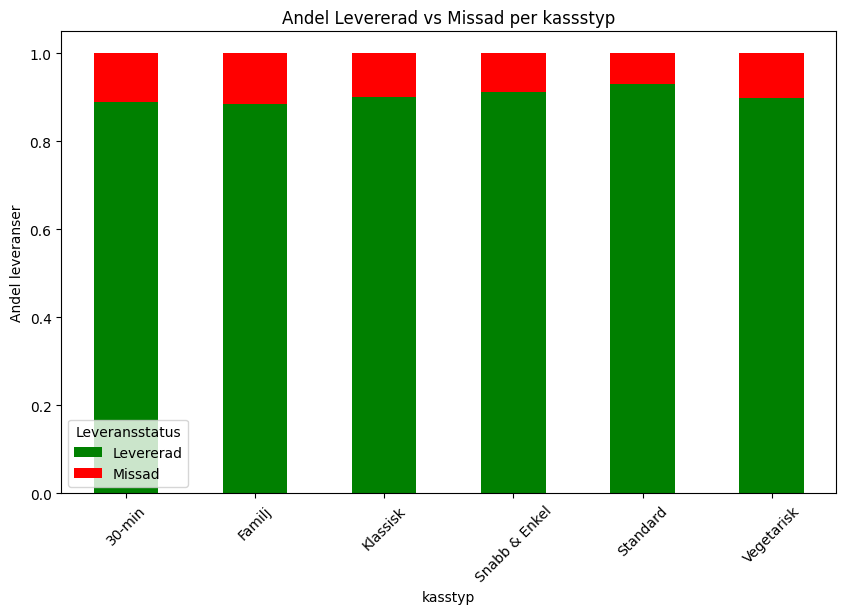

In [17]:
import matplotlib.pyplot as plt

# Plotta leveransstatus per kassstyp
leverans_kpi.plot(kind='bar', stacked=True, figsize=(10,6), color=['green', 'red'])
plt.ylabel('Andel leveranser')
plt.title('Andel Levererad vs Missad per kassstyp')
plt.legend(title='Leveransstatus')
plt.xticks(rotation=45)
plt.show()

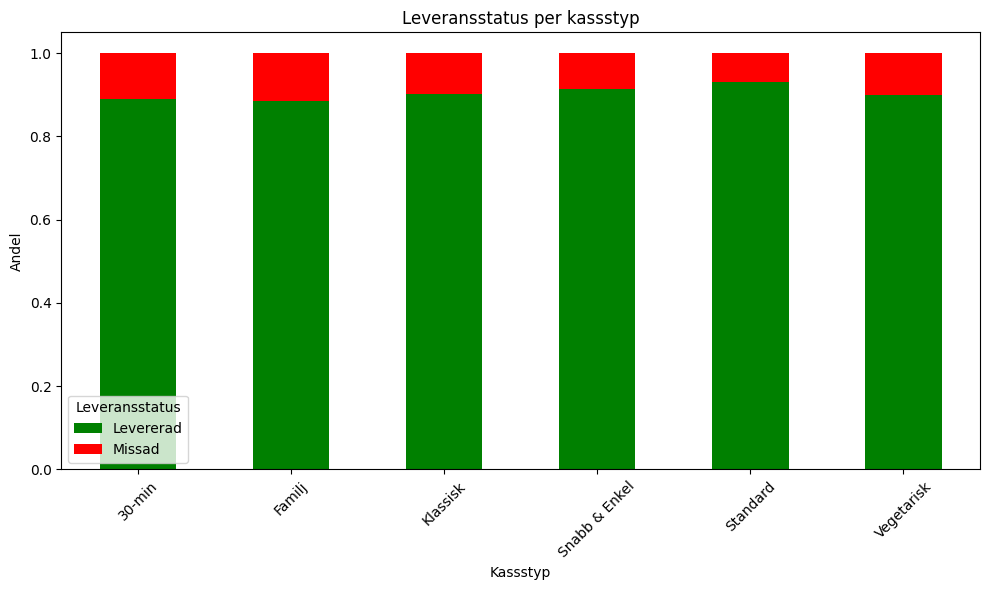

In [18]:
import matplotlib.pyplot as plt

# Räkna andel Levererad/Missad per kassstyp
status_per_kass = df.groupby('kasstyp')['leveransstatus'].value_counts(normalize=True).unstack()

# Staplat diagram
status_per_kass.plot(kind='bar', stacked=True, figsize=(10,6), color=['green','red'])
plt.title('Leveransstatus per kassstyp')
plt.ylabel('Andel')
plt.xlabel('Kassstyp')
plt.legend(title='Leveransstatus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/s7/zrpt9rpn16q_55htc8pyvwjc0000gn/T/ipykernel_67004/2156731440.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pris_per_kass.index, y=pris_per_kass.values, palette='viridis')


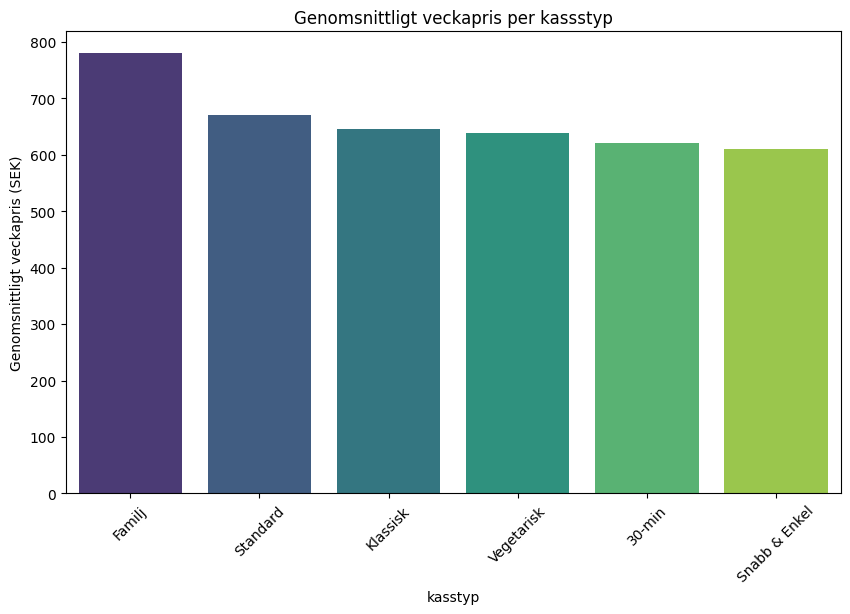

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Om du vill gruppera och få genomsnittligt veckapris per kassstyp
pris_per_kass = df.groupby('kasstyp')['veckapris'].mean().sort_values(ascending=False)

# Rita stapeldiagram
plt.figure(figsize=(10,6))
sns.barplot(x=pris_per_kass.index, y=pris_per_kass.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Genomsnittligt veckapris (SEK)')
plt.title('Genomsnittligt veckapris per kassstyp')
plt.show()

In [20]:
import sqlite3
import pandas as pd

# 1. Koppla till (eller skapa) databasen
conn = sqlite3.connect('matkassen.db')

# 2. Spara mitt tvättade DataFrame i databasen
df.to_sql('matkassen_tvattad', conn, if_exists='replace', index=False)

# 3. Kontrollera att tabellen finns
df_from_db = pd.read_sql('SELECT * FROM matkassen_tvattad LIMIT 5', conn)
print(df_from_db)

# 4. Stäng kopplingen
conn.close()

       leverans_id prenumeration_id     kund_id pren_startdatum paus_från  \
0  LEV-2024-000001        PREN-1002  KUND-05001      2024-04-10      None   
1  LEV-2024-000002        PREN-1003  KUND-05002      2024-06-12      None   
2  LEV-2024-000003        PREN-1011  KUND-05010      2024-05-11      None   
3  LEV-2024-000004        PREN-1017  KUND-05016      2024-05-26      None   
4  LEV-2024-000005        PREN-1018  KUND-05017      2024-05-02      None   

  paus_till pren_avslutsdatum        kasstyp kostpreferens antal_portioner  \
0      None               NaN       Klassisk      Standard               4   
1      None               NaN         Familj      Standard               6   
2      None        2024-07-16     Vegetarisk           NaN               4   
3      None               NaN  Snabb & Enkel     Laktosfri               4   
4      None        2024-08-19       Klassisk           NaN               2   

   ... leveransdatum postnummer veckapris  leveransstatus  \
0  ... 

In [21]:
# Om veckapris inte är float, konvertera först
df['veckapris'] = df['veckapris'].replace('[SEK,]', '', regex=True).astype(float)

# KPI: Genomsnittligt veckapris per kassstyp
kpi1 = df.groupby('kasstyp')['veckapris'].mean()
print(kpi1)

kasstyp
30-min           620.666667
Familj           779.288274
Klassisk         645.895319
Snabb & Enkel    609.465608
Standard         670.578947
Vegetarisk       638.497400
Name: veckapris, dtype: float64


In [22]:
leverans_per_kass = df.groupby('kasstyp')['leveransstatus'].value_counts(normalize=True).unstack()
print(leverans_per_kass)

leveransstatus  Levererad    Missad
kasstyp                            
30-min           0.888889  0.111111
Familj           0.884365  0.115635
Klassisk         0.902128  0.097872
Snabb & Enkel    0.912698  0.087302
Standard         0.929825  0.070175
Vegetarisk       0.899480  0.100520


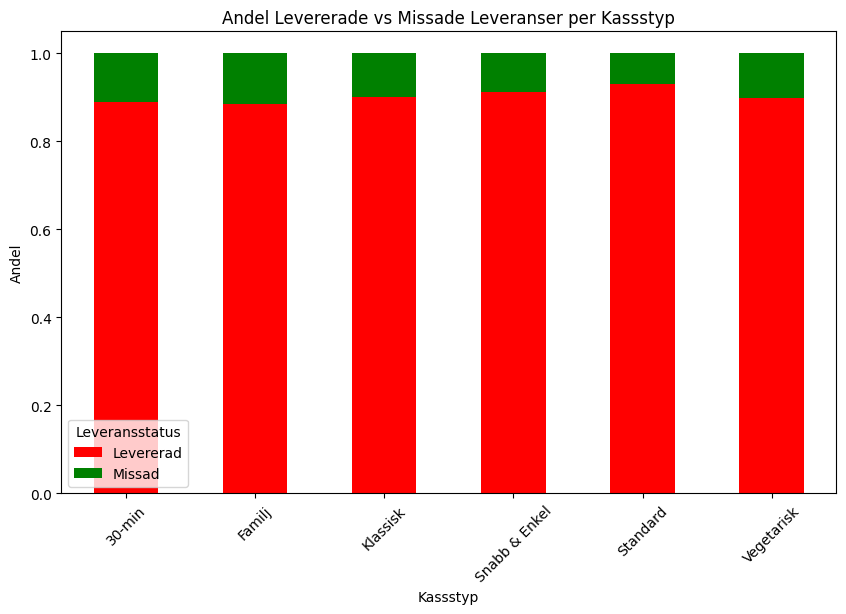

In [23]:
import matplotlib.pyplot as plt

# Data jag redan har
leverans_perc = df.groupby('kasstyp')['leveransstatus'].value_counts(normalize=True).unstack()

# Rita diagrammet
leverans_perc.plot(kind='bar', stacked=True, figsize=(10,6), color=['red','green'])
plt.title('Andel Levererade vs Missade Leveranser per Kassstyp')
plt.ylabel('Andel')
plt.xlabel('Kassstyp')
plt.legend(title='Leveransstatus')
plt.xticks(rotation=45)
plt.show()

In [24]:
import sqlite3

# Koppla till eller skapa databasen
conn = sqlite3.connect('matkassen.db')  # skapas i din mapp

# Spara ditt tvättade dataframe i databasen
df.to_sql('matkassen_tvattad', conn, if_exists='replace', index=False)

# Verifiera att tabellen finns och se första raderna
df_from_db = pd.read_sql('SELECT * FROM matkassen_tvattad LIMIT 5', conn)
print(df_from_db)

# Stäng kopplingen
conn.close()

       leverans_id prenumeration_id     kund_id pren_startdatum paus_från  \
0  LEV-2024-000001        PREN-1002  KUND-05001      2024-04-10      None   
1  LEV-2024-000002        PREN-1003  KUND-05002      2024-06-12      None   
2  LEV-2024-000003        PREN-1011  KUND-05010      2024-05-11      None   
3  LEV-2024-000004        PREN-1017  KUND-05016      2024-05-26      None   
4  LEV-2024-000005        PREN-1018  KUND-05017      2024-05-02      None   

  paus_till pren_avslutsdatum        kasstyp kostpreferens antal_portioner  \
0      None               NaN       Klassisk      Standard               4   
1      None               NaN         Familj      Standard               6   
2      None        2024-07-16     Vegetarisk           NaN               4   
3      None               NaN  Snabb & Enkel     Laktosfri               4   
4      None        2024-08-19       Klassisk           NaN               2   

   ... leveransdatum postnummer veckapris  leveransstatus  \
0  ... 

In [ ]:
%pip install transformers torch

  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached tokenizers-0.22.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (7.3 kB)
  Using cached safetensors-0.7.0-cp38-abi3-macosx_11_0_arm64.whl.metadata (4.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached fsspec-2026.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-macosx_11_0_arm64.whl.metadata (4.9 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Sentimentanalys kan läggas till senare med en giltig modell
# from transformers import pipeline
# classifier = pipeline("sentiment-analysis")  # använd standard modell

OSError: af-ai-center/bert-base-swedish-sentiment is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`

In [28]:
import sqlite3

conn = sqlite3.connect('matkassen.db')

df.to_sql(
    'matkassen_tvattad',
    conn,
    if_exists='replace',
    index=False
)

conn.close()

In [29]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('matkassen.db')

test_df = pd.read_sql(
    "SELECT * FROM matkassen_tvattad LIMIT 5",
    conn
)

conn.close()

test_df

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
0,LEV-2024-000001,PREN-1002,KUND-05001,2024-04-10,None,None,NaN,Klassisk,Standard,4,...,2024-07-03,10393,699.0,Levererad,Panerad fisk med remouladsås,Kyckling Tikka Masala,Köttfärssås med pasta,NaN,NaN,NaN
1,LEV-2024-000002,PREN-1003,KUND-05002,2024-06-12,None,None,NaN,Familj,Standard,6,...,2024-07-02,40545,919.0,Levererad,Chicken nuggets-sallad,Köttbullar med makaroner,Fiskpinnar med potatismos,Älskar att slippa planera middagar. Tack!,2024-07-07,4.0
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,None,None,2024-07-16,Vegetarisk,NaN,4,...,2024-07-02,10686,709.0,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
3,LEV-2024-000004,PREN-1017,KUND-05016,2024-05-26,None,None,NaN,Snabb & Enkel,Laktosfri,4,...,2024-07-01,40695,689.0,Levererad,15-minuters wok,Toast med avokado och ägg,Snabb tomatsoppa,Priset är högt men sparar tid. På gränsen.,2024-07-06,3.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,None,None,2024-08-19,Klassisk,NaN,2,...,2024-07-01,21938,499.0,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0


In [ ]:

# ============================================================================
# HUVUDFUNKTION FÖR DATARENGÖRING - DETTA ÄR VÅR ETL PIPELINE
# ============================================================================

def clean_matkassen_data(df):
    """
    Rengör och normaliserar Matkassen datasetet.
    
    Parametrar:
        df (pd.DataFrame): Råa data från Matkassen
        
    Retur:
        df (pd.DataFrame): Tvättad data
    """
    
    # === 1. NUMERISKA KOLUMNER ===
    
    # antal_portioner: konvertera till numerisk, fyll 0 och NaN med median
    df['antal_portioner'] = pd.to_numeric(df['antal_portioner'], errors='coerce')
    median_portioner = df['antal_portioner'].median()
    df['antal_portioner'] = df['antal_portioner'].replace(0, median_portioner)
    df['antal_portioner'] = df['antal_portioner'].fillna(median_portioner)
    
    # veckapris: ta bort extra tecken, byt komma mot punkt, konvertera till float
    df['veckapris'] = df['veckapris'].astype(str).str.replace(',', '.')
    df['veckapris'] = pd.to_numeric(df['veckapris'], errors='coerce')
    median_pris = df['veckapris'].median()
    df['veckapris'] = df['veckapris'].replace(0, median_pris)
    df['veckapris'] = df['veckapris'].fillna(median_pris)
    
    # === 2. DATUMKOLUMNER ===
    
    # Konvertera alla datumkolumner till datetime
    date_columns = ['pren_startdatum', 'paus_från', 'paus_till', 'pren_avslutsdatum', 'omdömesdatum']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Ta bort rader där pren_avslutsdatum saknas (vi behöver detta för analys)
    df = df.dropna(subset=['pren_avslutsdatum'])
    
    # Fyll saknade paus-datum med 9999-12-31 för att markera "ingen paus"
    df['paus_från_filled'] = df['paus_från'].fillna(pd.Timestamp('9999-12-31'))
    df['paus_till_filled'] = df['paus_till'].fillna(pd.Timestamp('9999-12-31'))
    
    # === 3. KATEGORISKA KOLUMNER - KASSTYP ===
    
    df['kasstyp'] = df['kasstyp'].astype(str).str.strip().str.lower()
    
    kasstyp_map = {
        'klassisk': 'Klassisk',
        'klassiskt': 'Klassisk',
        'klassiskt kassen': 'Klassisk',
        'classic': 'Klassisk',
        'familj': 'Familj',
        'familjekassen': 'Familj',
        'family': 'Familj',
        'famlij': 'Familj',
        'snabb & enkel': 'Snabb & Enkel',
        'snabb & enkel ': 'Snabb & Enkel',
        'quick': 'Snabb & Enkel',
        'snabb': 'Snabb & Enkel',
        'express': 'Snabb & Enkel',
        '30-min': 'Snabb & Enkel',
        'vegetarisk': 'Vegetarisk',
        'veg': 'Vegetarisk',
        'vegetarian': 'Vegetarisk',
        'veggie': 'Vegetarisk',
    }
    df['kasstyp'] = df['kasstyp'].map(kasstyp_map).fillna(df['kasstyp'].str.title())
    
    # Slå ihop okända kategorier till "Övriga"
    known_types = ['Klassisk', 'Snabb & Enkel', 'Vegetarisk', 'Familj', 'Standard']
    df.loc[~df['kasstyp'].isin(known_types), 'kasstyp'] = 'Övriga'
    
    # === 4. KATEGORISKA KOLUMNER - KOSTPREFERENS ===
    
    df['kostpreferens'] = df['kostpreferens'].astype(str).str.strip().str.lower()
    
    kostpreferens_map = {
        'laktosfri': 'Laktosfri',
        'lactose free': 'Laktosfri',
        'lf': 'Laktosfri',
        'fläskfri': 'Fläskfri',
        'ingen fläsk': 'Fläskfri',
        'nötfri': 'Nötfri',
        'nut free': 'Nötfri',
        'nf': 'Nötfri',
        'nötter': 'Nötfri',
        'glutenfri': 'Glutenfri',
        'gluten free': 'Glutenfri',
        'gf': 'Glutenfri',
        'standard': 'Standard',
        'normal': 'Standard',
        'ingen preferens': 'Standard',
        'inga': 'Standard',
        'unknown': 'Standard',
        'nan': 'Standard',
        '': 'Standard',
    }
    df['kostpreferens'] = df['kostpreferens'].map(kostpreferens_map).fillna('Standard')
    
    # === 5. KATEGORISKA KOLUMNER - LEVERANSSTATUS ===
    
    df['leveransstatus'] = df['leveransstatus'].astype(str).str.strip().str.lower()
    
    status_map = {
        'levererad': 'Levererad',
        'delivered': 'Levererad',
        'ok': 'Levererad',
        'missad': 'Missad',
        'missed': 'Missad',
        'ej levererad': 'Missad',
    }
    df['leveransstatus'] = df['leveransstatus'].map(status_map).fillna(df['leveransstatus'].str.title())
    
    # === 6. RECEPTKOLUMNER ===
    
    for col in ['recept_1', 'recept_2', 'recept_3']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.title()
            df[col] = df[col].fillna('Okänt')
    
    # === 7. OMDÖMESBETYG (lämnar som det är, NaN är ok) ===
    # omdömesbetyg: redan numeric, inga åtgärder
    
    return df


# Testa funktionen på huvuddatan
print("Kör datatvätt på huvuddata...")
df_cleaned = clean_matkassen_data(df.copy())
print(f"Huvuddata tvättad: {df_cleaned.shape[0]} rader, {df_cleaned.shape[1]} kolumner")
print(f"Kolumner: {list(df_cleaned.columns)}")


In [ ]:

# === STEG 2: LADDA OCH TVÄTTA VALIDATIONSDATAN ===

print("\nLaddar validationsdatan...")
df_validation = pd.read_csv('matkassen_validation.csv')
print(f"Validationsdatan: {df_validation.shape[0]} rader före tvätt")

# Tvätta validationsdatan med samma funktion
print("Kör datatvätt på validationsdatan...")
df_validation_cleaned = clean_matkassen_data(df_validation.copy())
print(f"Validationsdatan tvättad: {df_validation_cleaned.shape[0]} rader")

# === STEG 3: KOL OMN-JÄMFÖRELSE ===
print("\n✓ Datatvätt klar på båda dataseten!")
print(f"Huvuddata: {df_cleaned.shape}")
print(f"Validationsdatan: {df_validation_cleaned.shape}")


In [ ]:

# === STEG 4: IDENTIFIERA EVENTUELLA NYA FEL I VALIDATIONSDATAN ===

print("\n" + "="*60)
print("FELKONTROLL - JÄMFÖR HUVUDDATA OCH VALIDATIONSDATAN")
print("="*60)

# Funktion för datakvalitetskontroll
def quality_check(df, name):
    """Gör en datakvalitetskontroll på dataframen"""
    print(f"\n📊 {name}")
    print(f"   Rader: {df.shape[0]}")
    print(f"   Kolumner: {df.shape[1]}")
    print(f"   Saknade värden (totalt): {df.isna().sum().sum()}")
    print(f"   Duplikat rader: {df.duplicated().sum()}")
    
    # Visa per kolumn
    print(f"\n   Saknade värden per kolumn:")
    missing = df.isna().sum()
    if missing.sum() > 0:
        for col in missing[missing > 0].index:
            print(f"      {col}: {missing[col]} ({100*missing[col]/len(df):.1f}%)")
    else:
        print("      ✓ Inga saknade värden!")
    
    # Visa datatyper
    print(f"\n   Datatyper:")
    for col in df.columns[:5]:  # visa första 5
        print(f"      {col}: {df[col].dtype}")

# Kör kvalitetskontroll
quality_check(df_cleaned, "Huvuddata (tvättad)")
quality_check(df_validation_cleaned, "Validationsdatan (tvättad)")

# Jämför kolumner
print("\n" + "="*60)
print("KOLUMNJÄMFÖRING")
print("="*60)
if set(df_cleaned.columns) == set(df_validation_cleaned.columns):
    print("✓ Samma kolumner i båda dataseten!")
else:
    print("⚠ VARNING: Olika kolumner!")
    print(f"Endast i huvuddata: {set(df_cleaned.columns) - set(df_validation_cleaned.columns)}")
    print(f"Endast i validationsdatan: {set(df_validation_cleaned.columns) - set(df_cleaned.columns)}")

print("\n✓ Datarengöring och validering klar!")


In [ ]:

# === STEG 5: LADDA DATA I SQLITE ===

import sqlite3
import os

# Skapa databasfil
db_path = 'matkassen.db'
conn = sqlite3.connect(db_path)

print("\n" + "="*60)
print("LADDAR DATA I SQLITE DATABAS")
print("="*60)

# 1. Ladda huvuddata först
print("\n1. Laddar huvuddata...")
df_cleaned.to_sql('matkassen_tvattad', conn, if_exists='replace', index=False)
print(f"   ✓ {len(df_cleaned)} rader sparade i tabell 'matkassen_tvattad'")

# 2. Lägg till validationsdatan (append, inte replace!)
print("\n2. Lägger till validationsdatan...")
df_validation_cleaned.to_sql('matkassen_tvattad', conn, if_exists='append', index=False)
print(f"   ✓ {len(df_validation_cleaned)} rader tillagda")

# 3. Verifiera att allt är lagrat
print("\n3. Verifierar databas...")
total_rows = pd.read_sql('SELECT COUNT(*) as cnt FROM matkassen_tvattad', conn)['cnt'].values[0]
print(f"   ✓ Total rader i databas: {total_rows}")
print(f"   ✓ Förväntad totalt: {len(df_cleaned) + len(df_validation_cleaned)}")

# 4. Visa ett sample
sample = pd.read_sql('SELECT * FROM matkassen_tvattad LIMIT 3', conn)
print(f"\n4. Exempel på data från databas:")
print(sample)

# Stäng kopplingen
conn.close()

print(f"\n✓ Databas sparad som: {db_path}")
print(f"✓ Pipeline ETL klar! Tvättad data finns nu i SQLite-databasen.")
